In [1]:
# 주석 jdnfskjsadnfjkasdhbjk

import pandas as pd #merong
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

C:\Users\revie\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")

In [6]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0.0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401.0,1056223.0,12930715.0,646.0,20210925.0,00:00,2021-09-26 10:29:10.433,3269.0
1,1.0,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132.0,1030500.0,12896053.0,645.0,20210924.0,00:00,NaN,2433.0
2,2.0,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699.0,1034720.0,12823650.0,644.0,20210923.0,00:00,NaN,1716.0
3,3.0,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983.0,997996.0,12823456.0,643.0,20210922.0,00:00,NaN,1720.0
4,4.0,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263.0,965875.0,12826146.0,642.0,20210921.0,00:00,NaN,1729.0


In [7]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401.0,2441.0,2021.0,9.0
2021-09-24,3269.0,295132.0,2434.0,2021.0,9.0
2021-09-23,2433.0,292699.0,2427.0,2021.0,9.0
2021-09-22,1716.0,290983.0,2419.0,2021.0,9.0
2021-09-21,1720.0,289263.0,2413.0,2021.0,9.0


In [8]:
# 일별 확진자수 분포 확인

covid_data_new.describe().daily_decideCnt

count     602.000000
mean      495.682724
std       553.211568
min         0.000000
25%        61.250000
50%       362.500000
75%       652.000000
max      3269.000000
Name: daily_decideCnt, dtype: float64

<AxesSubplot:title={'center':'The Cumulative Trend Of COVID-19 Confirmed cases'}, xlabel='stateDt', ylabel='decideCnt'>

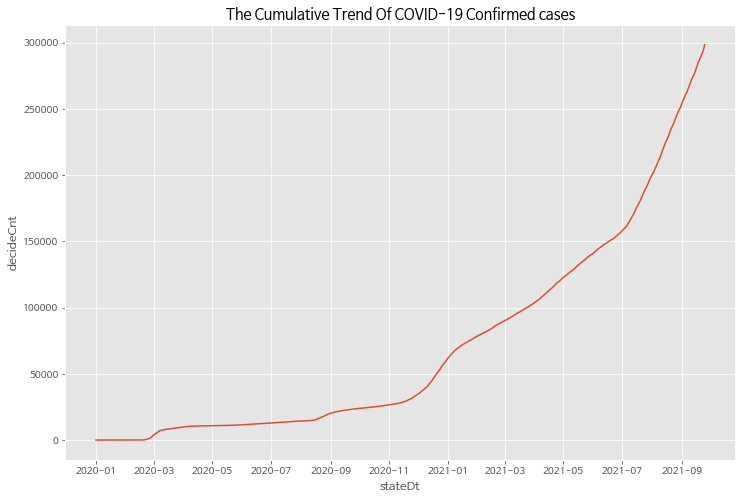

In [9]:
# 코로나 누적 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('The Cumulative Trend Of COVID-19 Confirmed cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='decideCnt')

<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

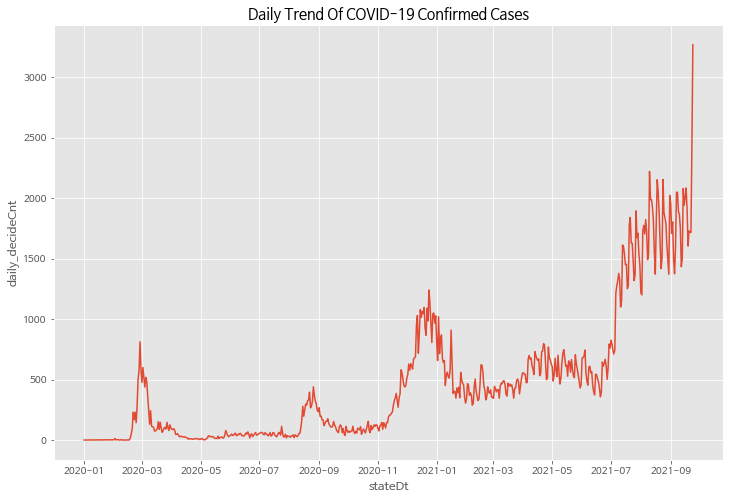

In [10]:
# 코로나 일별 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':'The Trend Of COVID-19 Confirmed Cases Per Month'}, xlabel='year,month'>

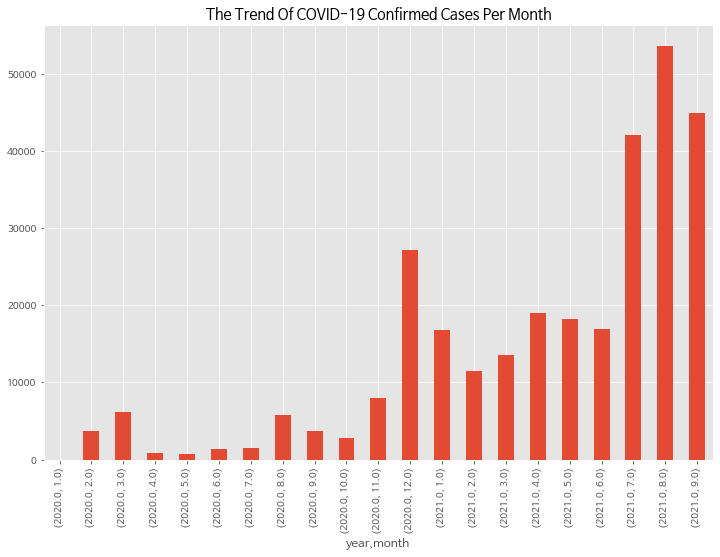

In [11]:
# 코로나 월별 확진자 시각화

covid_data_new.groupby(['year','month']).daily_decideCnt.sum().plot(kind='bar',figsize=(12,8), title = "The Trend Of COVID-19 Confirmed Cases Per Month")

In [12]:
# 대유행 기간 확진자 수 추출

covid_data_1st_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==2)|(covid_data_new.month==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==8)|(covid_data_new.month==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.year==2020) & ((covid_data_new.month==12)|(covid_data_new.month==11)))|
                ((covid_data_new.year==2021)&((covid_data_new.month==1)|(covid_data_new.month==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.year==2021) & ((covid_data_new.month==6)|(covid_data_new.month==7)|(covid_data_new.month==8)|(covid_data_new.month==9))]

covid_data_1st_pandemic.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2020-03-31,101.0,9786.0,162.0,2020.0,3.0
2020-03-30,125.0,9661.0,158.0,2020.0,3.0
2020-03-29,78.0,9583.0,152.0,2020.0,3.0
2020-03-28,105.0,9478.0,144.0,2020.0,3.0
2020-03-27,146.0,9332.0,139.0,2020.0,3.0


<AxesSubplot:title={'center':'Trend Of The 4th Pandemic'}, xlabel='stateDt', ylabel='daily_decideCnt'>

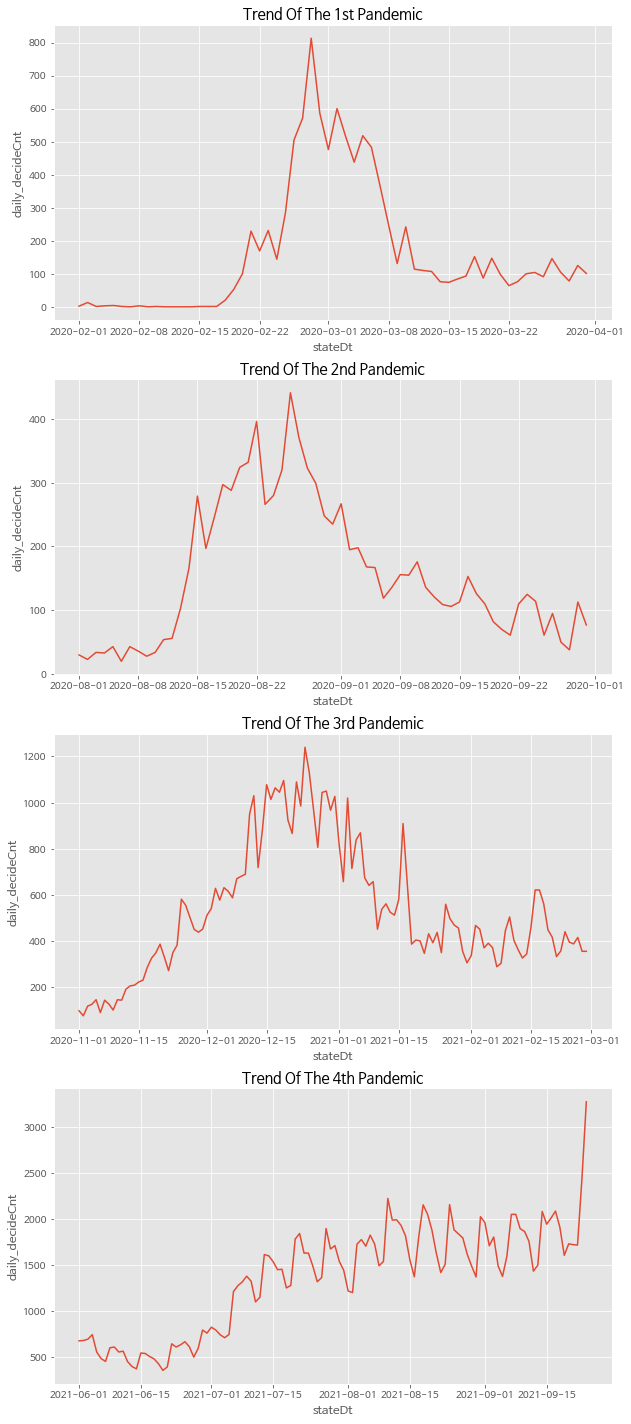

In [13]:
# 대유행 기간 확진자 수 시각화

fig, axes=plt.subplots(nrows=4)
fig.set_size_inches(10,25)

axes[0].set(title='Trend Of The 1st Pandemic')
axes[1].set(title='Trend Of The 2nd Pandemic')
axes[2].set(title='Trend Of The 3rd Pandemic')
axes[3].set(title='Trend Of The 4th Pandemic')

sns.lineplot(data=covid_data_1st_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0])
sns.lineplot(data=covid_data_2nd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1])
sns.lineplot(data=covid_data_3rd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[2])
sns.lineplot(data=covid_data_4th_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[3])

4차례의 대유행이 시각화로 뚜렷하게 표현되며, 4차 대유행은 여전히 진행중이다.

([<matplotlib.patches.Wedge at 0x1c40734f220>,
 [Text(-0.807759249318728, -0.7466759639495871, '2020.0'),
  Text(0.8077592143643026, 0.7466760017635258, '2021.0')],
 [Text(-0.4405959541738516, -0.4072777985179566, '20.7%'),
  Text(0.4405959351078014, 0.40727781914374134, '79.3%')])

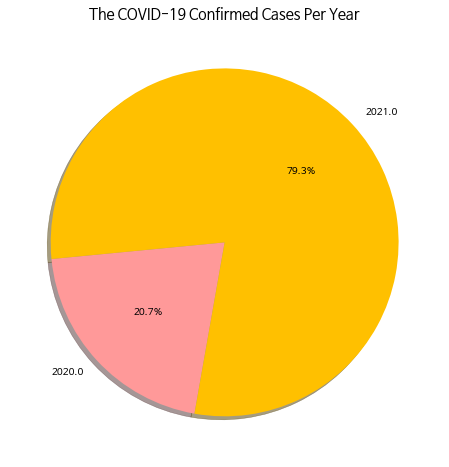

In [14]:
# 코로나 년도별 확진자 시각화

labels=covid_data_new.groupby(['year']).daily_decideCnt.sum().index
values=covid_data_new.groupby(['year']).daily_decideCnt.sum().values
colors = ['#ff9999', '#ffc000']

plt.figure(figsize=(8,8))
plt.title('The COVID-19 Confirmed Cases Per Year')
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)

년도별 코로나 확진자 수를 확인해본 결과, 아직 2021년이 끝나지 않았음에도 불구하고, 2021년의 확진자 수는 2020년의 확진자 수의 4배에 근접한다.

In [17]:
traffic_data_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_data_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_data_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_data_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_data_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_data_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_data_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_data_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_data_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_data_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_data_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_data_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_data_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_data_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [18]:
traffic_data=pd.concat([traffic_data_2018_01,traffic_data_2018_02,traffic_data_2018_03,traffic_data_2018_04,
                        traffic_data_2019_01,traffic_data_2019_02,traffic_data_2019_03,traffic_data_2019_04,
                        traffic_data_2020_01,traffic_data_2020_02,traffic_data_2020_03,traffic_data_2020_04,
                        traffic_data_2021_01,traffic_data_2021_02])

In [19]:
traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data['day_of_week']=traffic_data.index.dayofweek 
traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


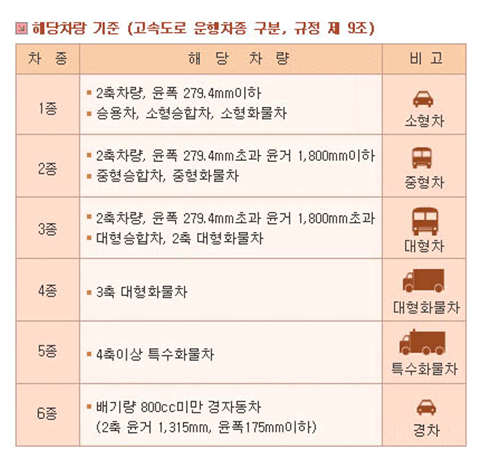

In [20]:
# 명칭이 불규칙하여 통일

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')

In [21]:
# 모든 곳의 톨게이트에 대한 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total['year']=traffic_data_total.index.year
traffic_data_total['month']=traffic_data_total.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data_total['day_of_week']=traffic_data_total.index.dayofweek
traffic_data_total.day_of_week=traffic_data_total.day_of_week.apply(lambda x : days[x])
traffic_data_total.head()

<ipython-input-21-399b72e776b6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()


,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230,2018,1,MON
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615,2018,1,TUE
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487,2018,1,WED
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316,2018,1,THU
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744,2018,1,FRI


<AxesSubplot:title={'center':'The Trend Of Type fist Traffic On Saturdays (2018-2021)\n'}, xlabel='집계일자', ylabel='1종교통량'>

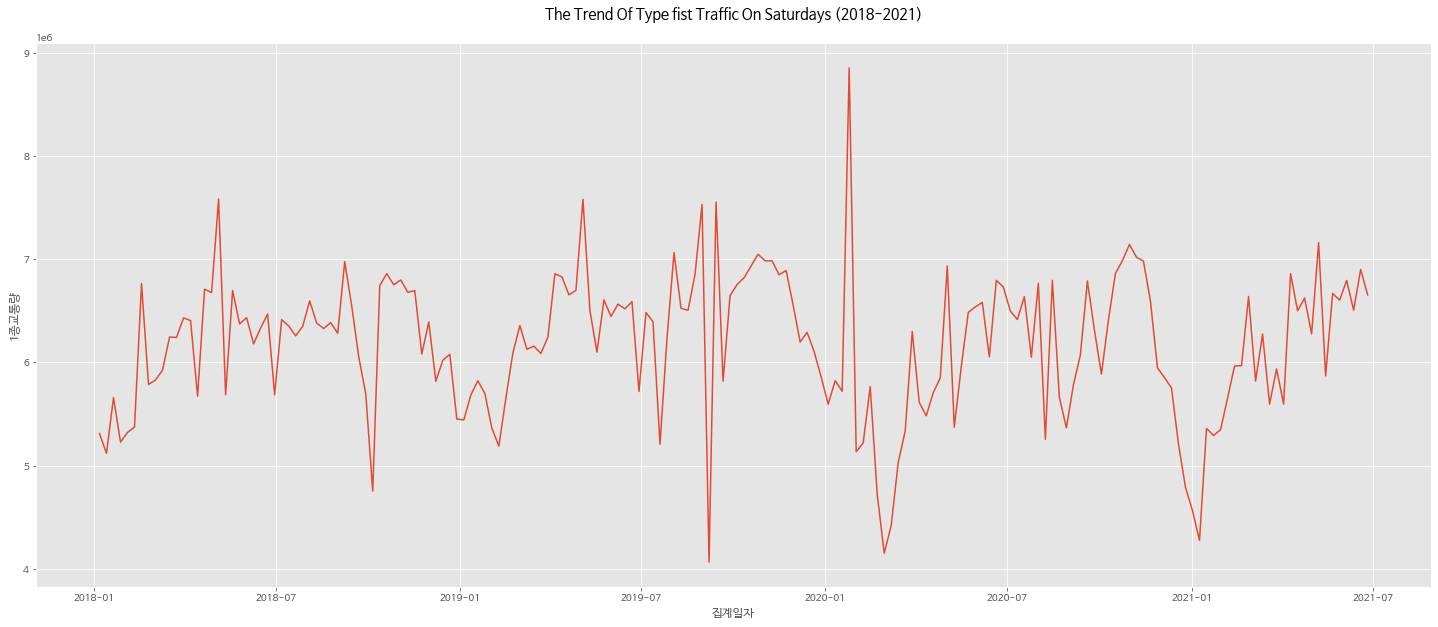

In [22]:
# 2018~2021 교통량 추이 확인 // 1종교통량 토요일

plt.figure(figsize=(25,10))
plt.title('The Trend Of Type fist Traffic On Saturdays (2018-2021)\n')
sns.lineplot(data=traffic_data_total[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':'The Trend Of Type fist Traffic On Saturdays (2020-2021)\n'}, xlabel='집계일자', ylabel='1종교통량'>

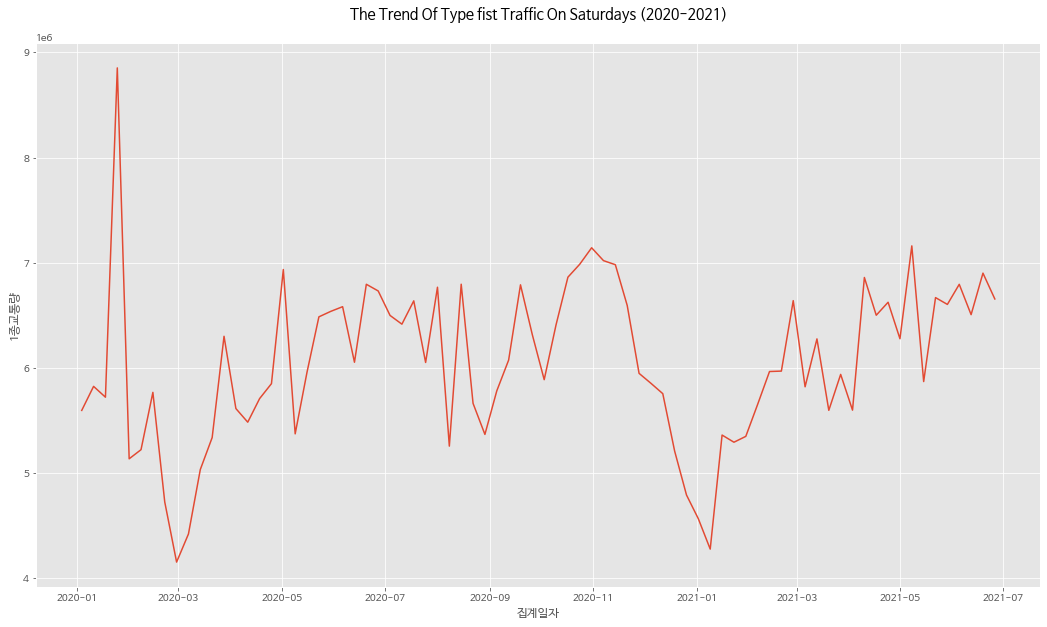

In [23]:
# 코로나 발생 이후 교통량 추이 확인 // 1종교통량 토요일

plt.figure(figsize=(18,10))
plt.title('The Trend Of Type fist Traffic On Saturdays (2020-2021)\n')
sns.lineplot(data=traffic_data_total[((traffic_data_total.year==2020)|(traffic_data_total.year==2021))&(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량')

In [24]:
# 요일별 차종 평균 교통량

day_traffic_data_1st=traffic_data.groupby('day_of_week')['1종교통량'].mean()
day_traffic_data_remain=traffic_data.groupby('day_of_week')['2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량'].mean()
day_traffic_data_total=traffic_data.groupby('day_of_week')['총교통량'].mean() 

<ipython-input-24-7de8cc10312e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_traffic_data_remain=traffic_data.groupby('day_of_week')['2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량'].mean()


<AxesSubplot:title={'center':'The Average Traffic Volume By Day'}, xlabel='day_of_week'>

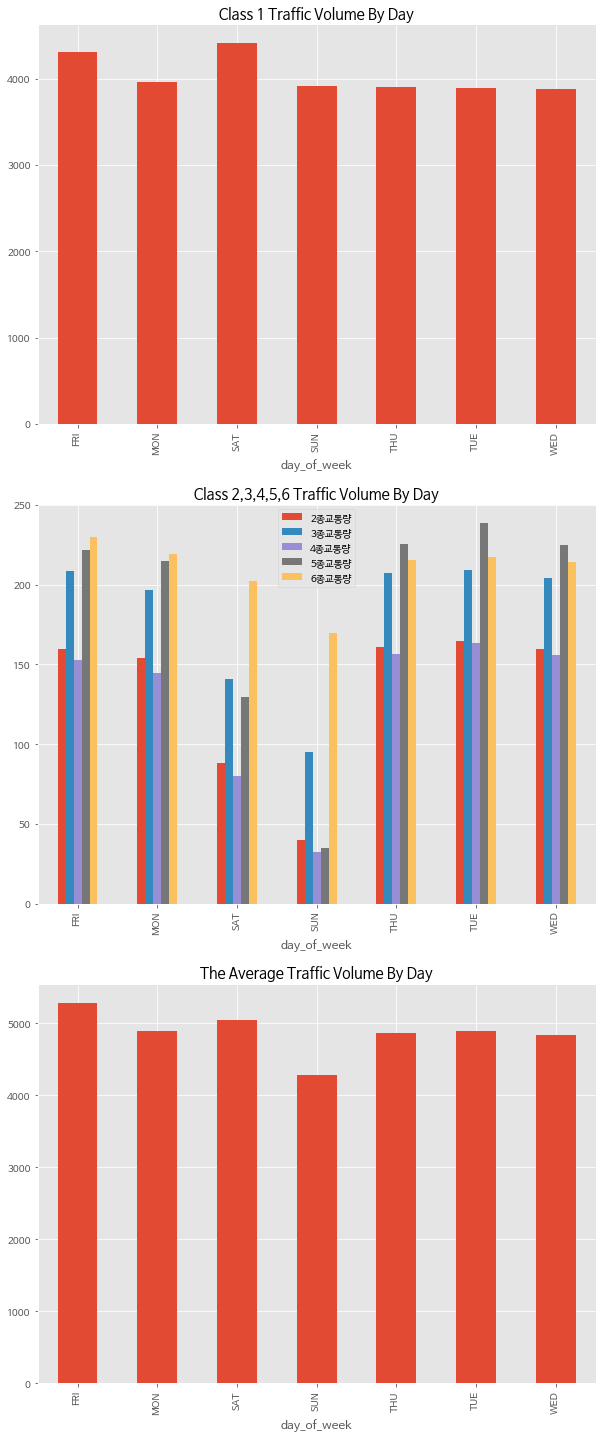

In [25]:
fig, axes=plt.subplots(nrows=3)
fig.set_size_inches(10,25)

axes[0].set(title='Class 1 Traffic Volume By Day')
axes[1].set(title='Class 2,3,4,5,6 Traffic Volume By Day')
axes[2].set(title='The Average Traffic Volume By Day')

day_traffic_data_1st.plot(kind='bar',ax=axes[0])
day_traffic_data_remain.plot(kind='bar',ax=axes[1])
day_traffic_data_total.plot(kind='bar',ax=axes[2])

요일별 교통량을 확인해본 결과, 1종 교통의 교통량은 요일과 관계없이 거의 비슷하다.
2종부터 6종까지의 교통량은 주말이 적으며, 평일이 많다.
이는 근무를 위해 움직이는 사람들의 교통량에 의해서 많다고 생각되어지며,
개인적인 일로 움직이는 교통량을 확인하기 위해서는 주말의 교통량을 확인해볼 필요가 있다고 생각된다.
또한, 1종 교통량 혹은 총 교통량보다는 나머지 교통량을 확인해보는 것이 뚜렷한 변화를 확인해볼 수 있을 것 같다.

In [26]:
# 가장 유동인구가 많은 서울시의 교통량을 확인해보자

seoul_traffic_data=traffic_data[(traffic_data['영업소명']=='서서울')|(traffic_data['영업소명']=='동서울')|(traffic_data['영업소명']=='서울')]
seoul_traffic_data=seoul_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
seoul_traffic_data['year']=seoul_traffic_data.index.year
seoul_traffic_data['month']=seoul_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
seoul_traffic_data['day_of_week']=seoul_traffic_data.index.dayofweek
seoul_traffic_data.day_of_week=seoul_traffic_data.day_of_week.apply(lambda x : days[x])
seoul_traffic_data.head()

<ipython-input-26-775ce98fd947>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_traffic_data=seoul_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()


,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,422993,5819,20619,2523,1392,18046,471392,2018,1,MON
2018-01-02,412943,17056,29178,11928,9202,22481,502788,2018,1,TUE
2018-01-03,395108,20067,32127,16606,11753,22022,497683,2018,1,WED
2018-01-04,402322,19891,32029,16087,11928,22179,504436,2018,1,THU
2018-01-05,435052,19531,33259,15420,11579,23623,538464,2018,1,FRI


<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Saturday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

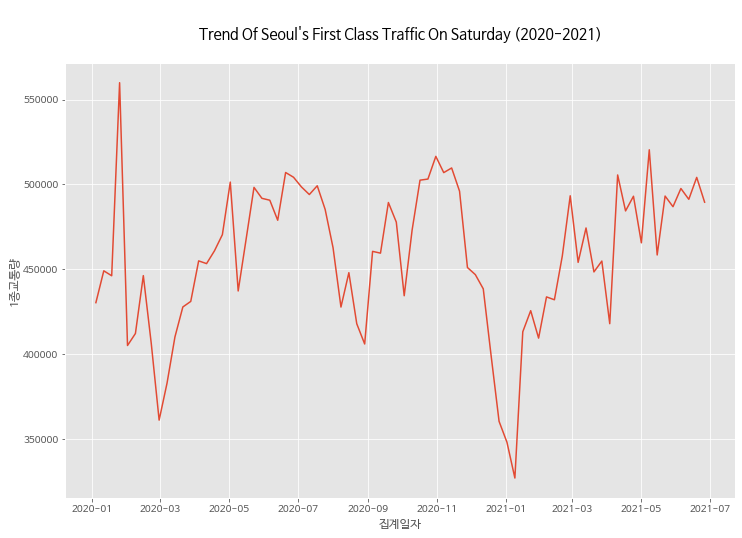

In [27]:
# 1종 교통량(대부분의 자가용) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Saturday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SAT')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

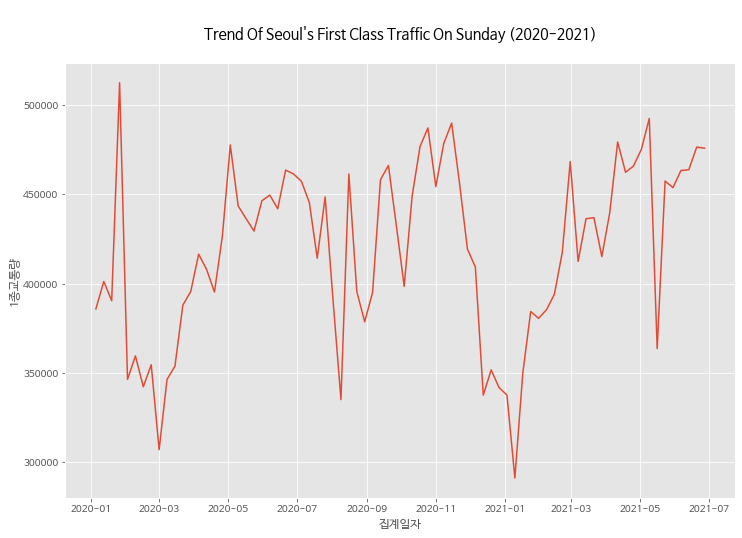

In [28]:
# 1종 교통량(대부분의 자가용) 일요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

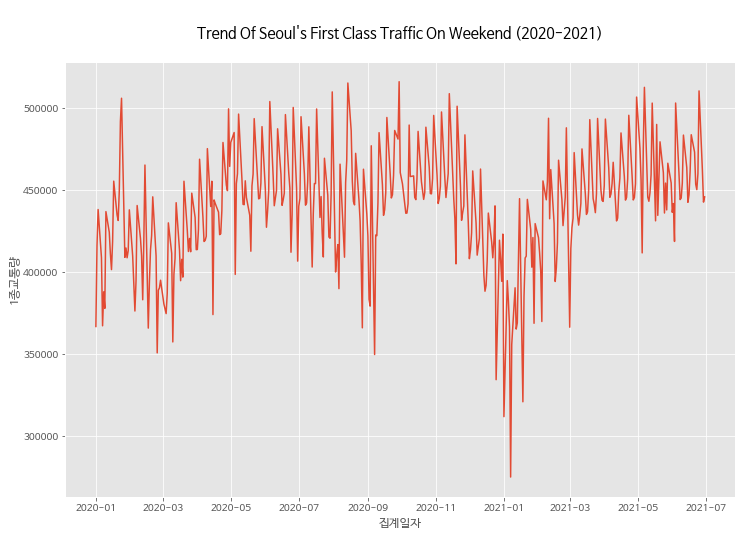

In [29]:
# 1종 교통량(대부분의 자가용) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekend (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                    |(seoul_traffic_data.day_of_week=='TUE')
                                    |(seoul_traffic_data.day_of_week=='WED')
                                    |(seoul_traffic_data.day_of_week=='THU')
                                    |(seoul_traffic_data.day_of_week=='FRI'))
                                    &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

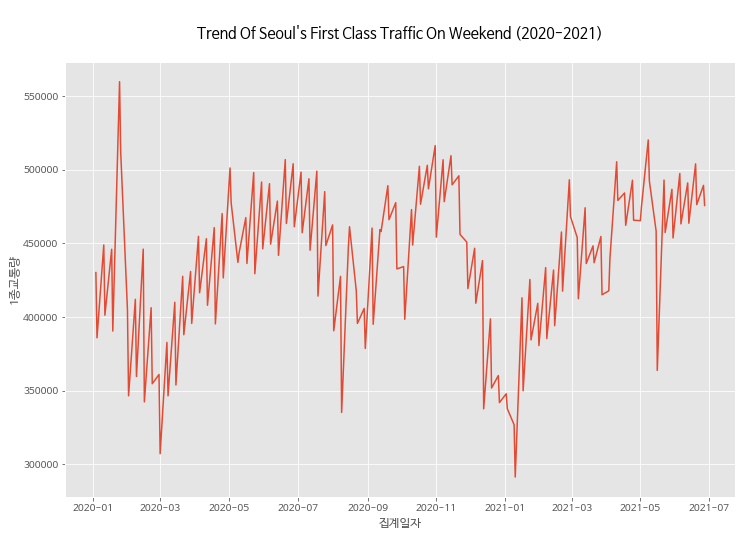

In [30]:
# 1종 교통량(대부분의 자가용) 주말 분석 ! 

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekend (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='SUN')|(seoul_traffic_data.day_of_week=='SAT'))&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

In [31]:
seoul_weekdays_first_median_2018_2021=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                                        |(seoul_traffic_data.day_of_week=='TUE')
                                                        |(seoul_traffic_data.day_of_week=='WED')
                                                        |(seoul_traffic_data.day_of_week=='THU')
                                                        |(seoul_traffic_data.day_of_week=='FRI'))]['1종교통량'].median()
seoul_weekdays_first_median_2018_2019=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                                        |(seoul_traffic_data.day_of_week=='TUE')
                                                        |(seoul_traffic_data.day_of_week=='WED')
                                                        |(seoul_traffic_data.day_of_week=='THU')
                                                        |(seoul_traffic_data.day_of_week=='FRI'))
                                                        &((seoul_traffic_data.year==2018)|(seoul_traffic_data.year==2019))]['1종교통량'].median()
print('2018-2021 주중 서울시 1종 교통량 중앙값 : %.1f\n2018-2019 주중 서울시 1종 교통량 중앙값 : %.1f'%(seoul_weekdays_first_median_2018_2021,seoul_weekdays_first_median_2018_2019))

2018-2021 주중 서울시 1종 교통량 중앙값 : 440439.5
2018-2019 주중 서울시 1종 교통량 중앙값 : 439122.5


In [32]:
seoul_weekend_first_median_2018_2021=seoul_traffic_data[((seoul_traffic_data.day_of_week=='SAT')
                                                        |(seoul_traffic_data.day_of_week=='SUN'))]['1종교통량'].median()
seoul_weekend_first_median_2018_2019=seoul_traffic_data[((seoul_traffic_data.day_of_week=='SAT')
                                                        |(seoul_traffic_data.day_of_week=='SUN'))
                                                        &((seoul_traffic_data.year==2018)|(seoul_traffic_data.year==2019))]['1종교통량'].median()
print('2018-2021 주말 서울시 1종 교통량 중앙값 : %.1f\n2018-2019 주말 서울시 1종 교통량 중앙값 : %.1f'%(seoul_weekend_first_median_2018_2021,seoul_weekend_first_median_2018_2019))

2018-2021 주말 서울시 1종 교통량 중앙값 : 458422.0
2018-2019 주말 서울시 1종 교통량 중앙값 : 467415.5


<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


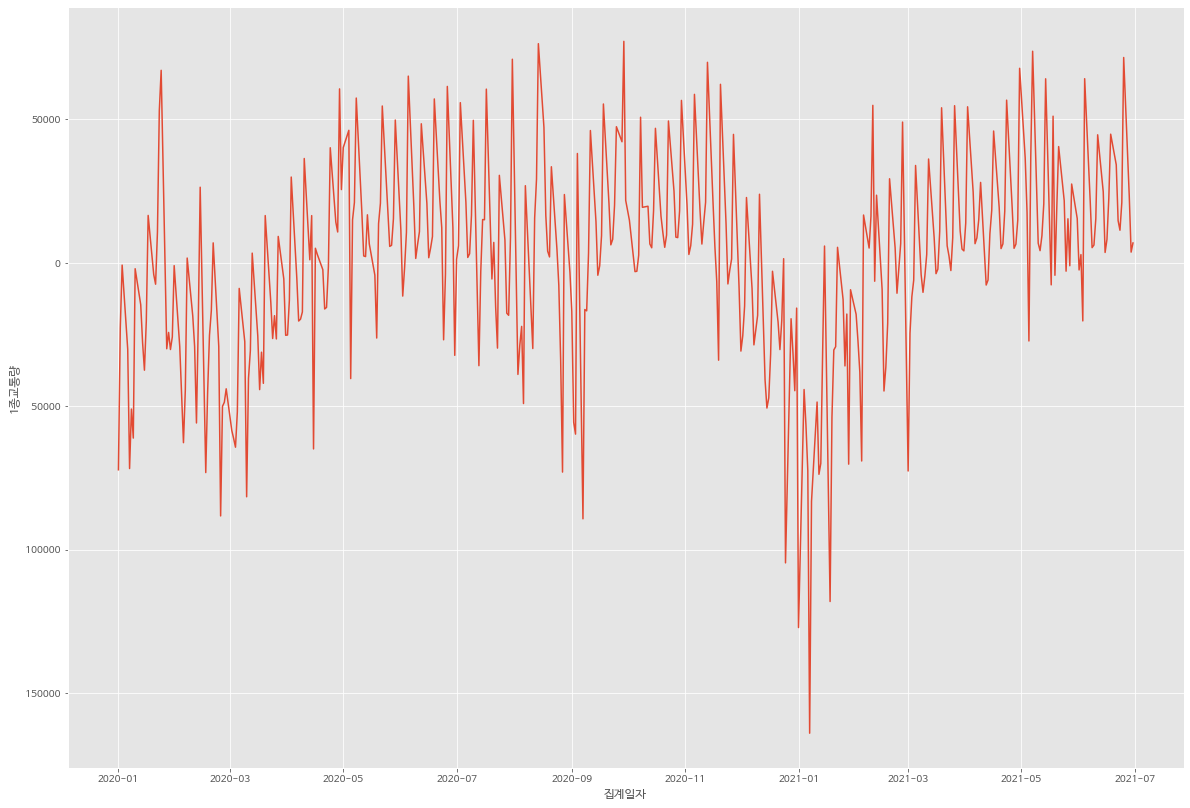

In [33]:
plt.figure(figsize=(20,14))
seoul_weekdays_first_diff=pd.DataFrame(seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                            |(seoul_traffic_data.day_of_week=='TUE')
                                            |(seoul_traffic_data.day_of_week=='WED')
                                            |(seoul_traffic_data.day_of_week=='THU')
                                            |(seoul_traffic_data.day_of_week=='FRI'))
                                            &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))]['1종교통량']-seoul_weekdays_first_median_2018_2019)

seoul_weekdays_first_diff['집계일자']=seoul_weekdays_first_diff.index
sns.lineplot(data=seoul_weekdays_first_diff,x='집계일자', y='1종교통량')

### 2종 교통량

자가용이 아닌 택배 차량을 확인해보자  
쿠팡, CJ택배와 같은 화물 차량은 2종 차량으로 분류된다.

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

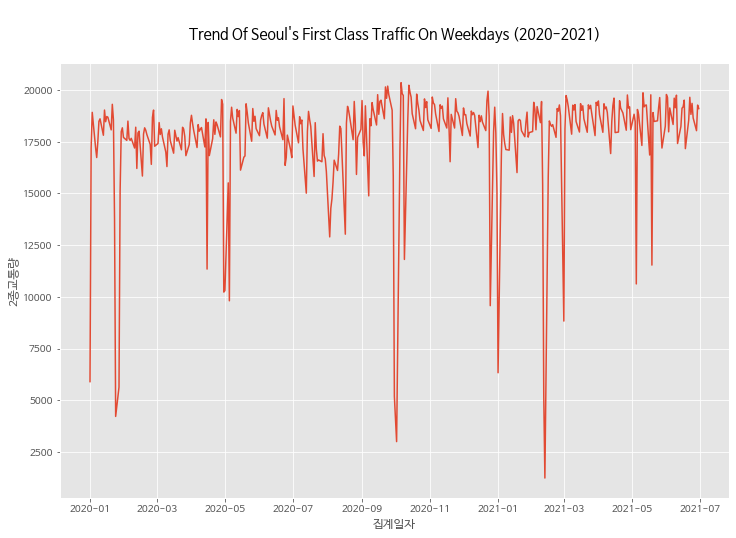

In [34]:
# 2종 교통량(중형차) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                      |(seoul_traffic_data.day_of_week=='TUE')
                                      |(seoul_traffic_data.day_of_week=='WED')
                                      |(seoul_traffic_data.day_of_week=='THU')
                                      |(seoul_traffic_data.day_of_week=='FRI'))
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

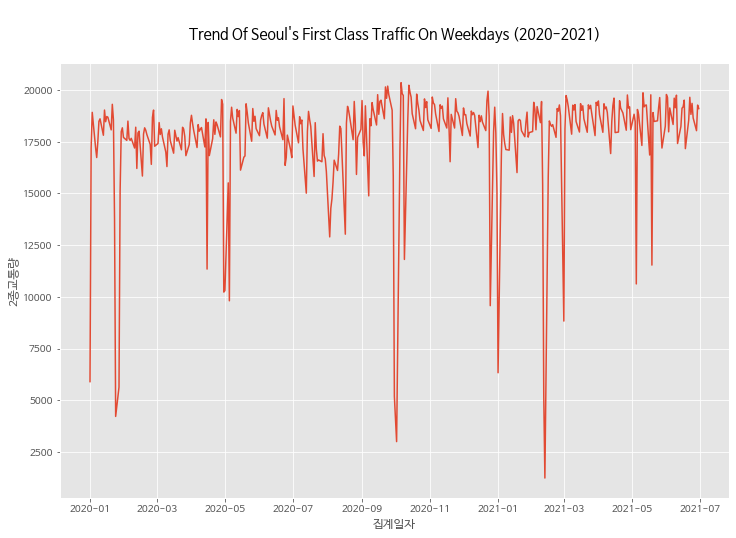

In [35]:
# 2종 교통량(중형차) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                      |(seoul_traffic_data.day_of_week=='TUE')
                                      |(seoul_traffic_data.day_of_week=='WED')
                                      |(seoul_traffic_data.day_of_week=='THU')
                                      |(seoul_traffic_data.day_of_week=='FRI'))
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

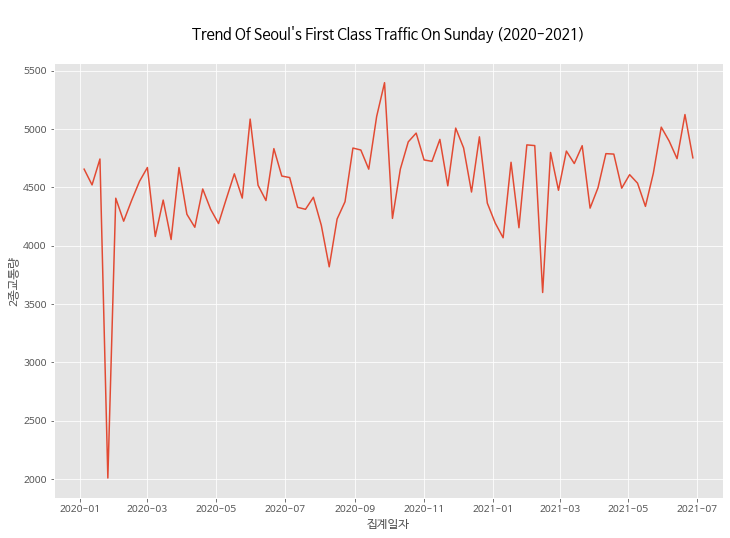

In [36]:
# 2종 교통량(중형차) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

## 대구 교통량 분석

In [37]:
#코로나 19 1차 대유행발발 지역인 대구를 추가적으로 살펴 보자.

daegu_traffic_data=traffic_data[(traffic_data['영업소명']=='서대구')|(traffic_data['영업소명']=='남대구')|(traffic_data['영업소명']=='북대구')].groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
daegu_traffic_data['year']=daegu_traffic_data.index.year
daegu_traffic_data['month']=daegu_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
daegu_traffic_data['day_of_week']=daegu_traffic_data.index.dayofweek
daegu_traffic_data.day_of_week=daegu_traffic_data.day_of_week.apply(lambda x : days[x])
daegu_traffic_data.head()

<ipython-input-37-a4e2f199ae44>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daegu_traffic_data=traffic_data[(traffic_data['영업소명']=='서대구')|(traffic_data['영업소명']=='남대구')|(traffic_data['영업소명']=='북대구')].groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()


,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,158432,1384,3607,712,516,5847,170498,2018,1,MON
2018-01-02,161220,6162,7056,3431,3685,7883,189437,2018,1,TUE
2018-01-03,160008,7111,8303,4490,4598,7705,192215,2018,1,WED
2018-01-04,161046,6983,8325,4443,4951,7736,193484,2018,1,THU
2018-01-05,174056,7281,8340,4325,5110,8321,207433,2018,1,FRI


In [38]:
two_traffic_temp = daegu_traffic_data['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
daegu_traffic_data['diff_temp']=two_traffic_temp
daegu_traffic_data.head()
daegu_traffic_data['diff']=daegu_traffic_data['2종교통량']-daegu_traffic_data['diff_temp']
daegu_traffic_data['diff2']=daegu_traffic_data['2종교통량']-daegu_traffic_data['2종교통량'].median()

[Text(0.5, 1.0, '\n대구 1종 교통량 분석\n')]

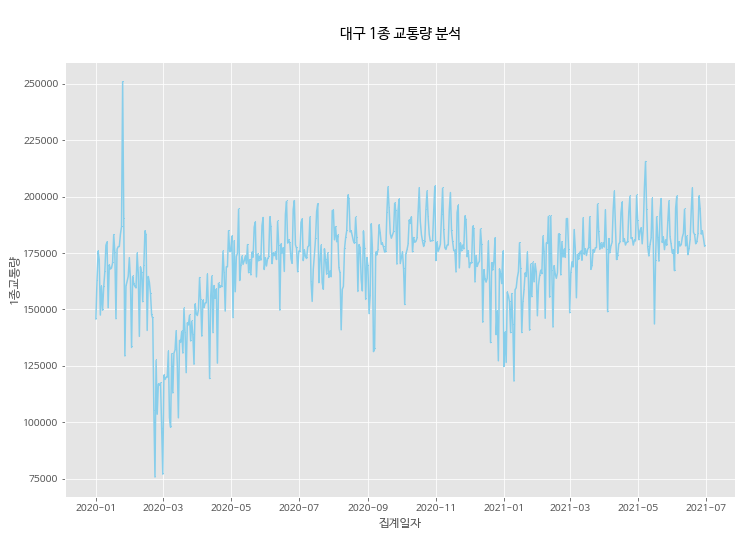

In [39]:
# 1종 교통량(대부분의 자가용) 분석 /

plt.figure(figsize=(12,8)) 
daegu_1_all=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_all.set(title='\n대구 1종 교통량 분석\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 토요일\n')]

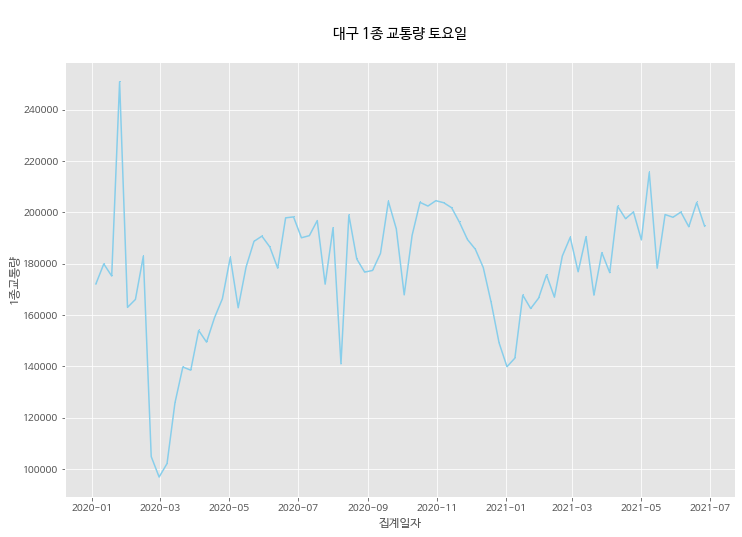

In [40]:
# 1종 교통량(대부분의 자가용) 분석 // 토요일

plt.figure(figsize=(12,8)) 
daegu_1_sat=sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SAT')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_sat.set(title='\n대구 1종 교통량 토요일\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 일요일\n')]

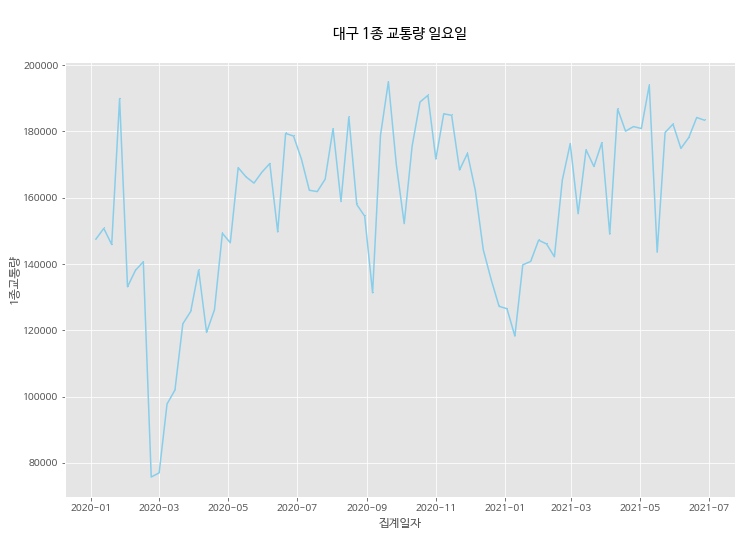

In [41]:
# 1종 교통량(대부분의 자가용) 분석 // 일요일

plt.figure(figsize=(12,8)) 
daegu_1_sun=sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SUN')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_sun.set(title='\n대구 1종 교통량 일요일\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 주말\n')]

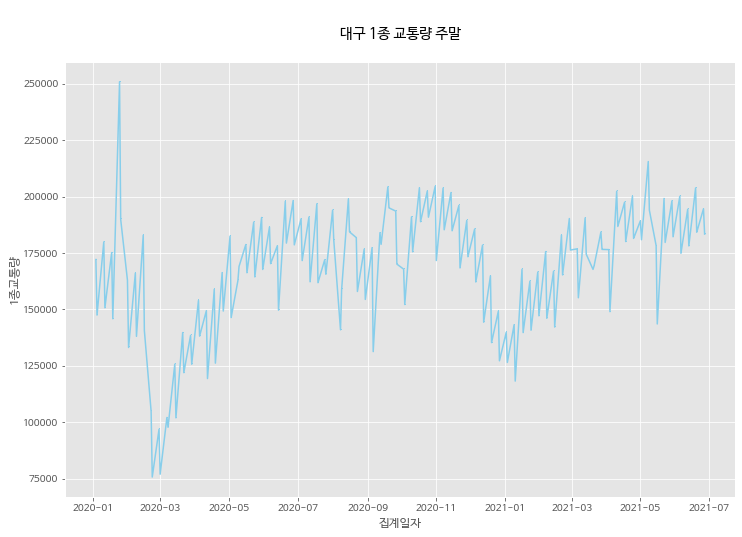

In [42]:
# 1종 교통량(대부분의 자가용) 분석 // 주말

plt.figure(figsize=(12,8)) 
daegu_1_weekend=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='SAT')|(daegu_traffic_data.day_of_week=='SUN'))&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_weekend.set(title='\n대구 1종 교통량 주말\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 주중\n')]

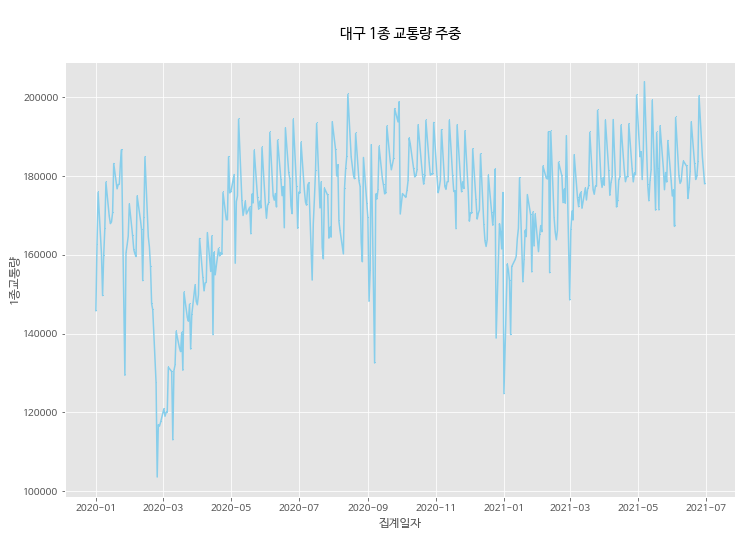

In [43]:
# 1종 교통량(대부분의 자가용) 분석 // 주중

plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='MON')|(daegu_traffic_data.day_of_week=='TUE')|(daegu_traffic_data.day_of_week=='WED')|(daegu_traffic_data.day_of_week=='THU')|(daegu_traffic_data.day_of_week=='FRI'))&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 1종 교통량 주중\n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference\n')]

C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


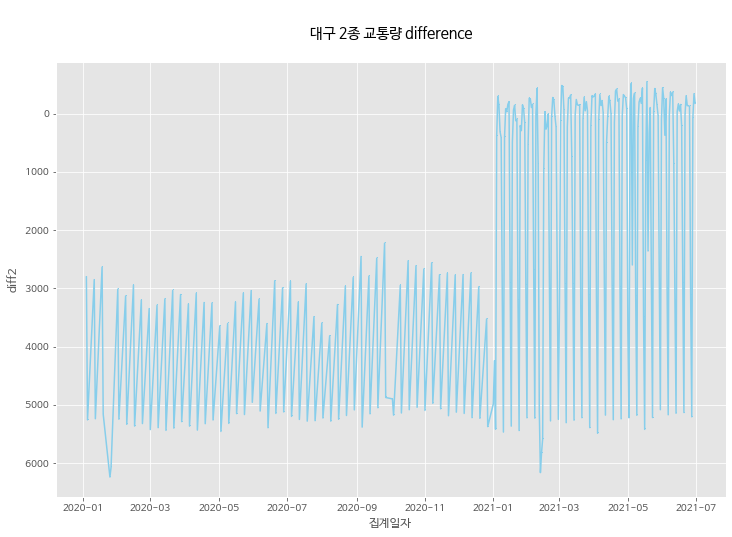

In [44]:
# 2종 교통량(대부분의 자가용) 분석 // 주중

plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=daegu_traffic_data[(((daegu_traffic_data.day_of_week=='SAT')|(daegu_traffic_data.day_of_week=='SUN'))&(daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='diff2',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference\n')

<ipython-input-45-5c0d0aa01e63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_mon['diff_temp']=two_traffic_temp
<ipython-input-45-5c0d0aa01e63>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_mon['diff']=two_traffic_mon['2종교통량']-two_traffic_mon['diff_temp']
<ipython-input-45-5c0d0aa01e63>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

[Text(0.5, 1.0, '\n대구 2종 교통량 difference MON\n')]

C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


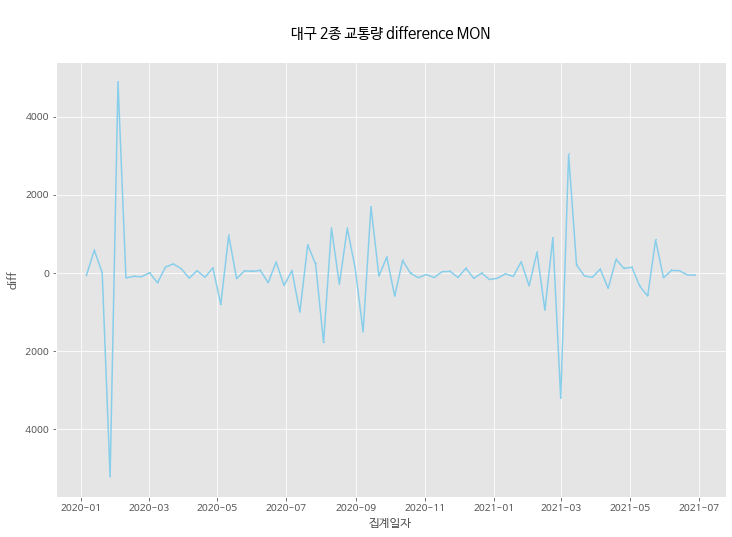

In [45]:
#요일별 편차 // 월요일

two_traffic_mon= daegu_traffic_data[daegu_traffic_data.day_of_week=='MON']
two_traffic_temp=two_traffic_mon['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_mon['diff_temp']=two_traffic_temp
two_traffic_mon['diff']=two_traffic_mon['2종교통량']-two_traffic_mon['diff_temp']
two_traffic_mon['diff2']=two_traffic_mon['2종교통량']-two_traffic_mon['2종교통량'].median()
two_traffic_mon.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_mon[((two_traffic_mon.year==2020)|(two_traffic_mon.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference MON\n')

<ipython-input-46-c050bfd03f1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_tue['diff_temp']=two_traffic_temp
<ipython-input-46-c050bfd03f1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_tue['diff']=two_traffic_tue['2종교통량']-two_traffic_tue['diff_temp']
<ipython-input-46-c050bfd03f1f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

[Text(0.5, 1.0, '\n대구 2종 교통량 difference TUE \n')]

C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


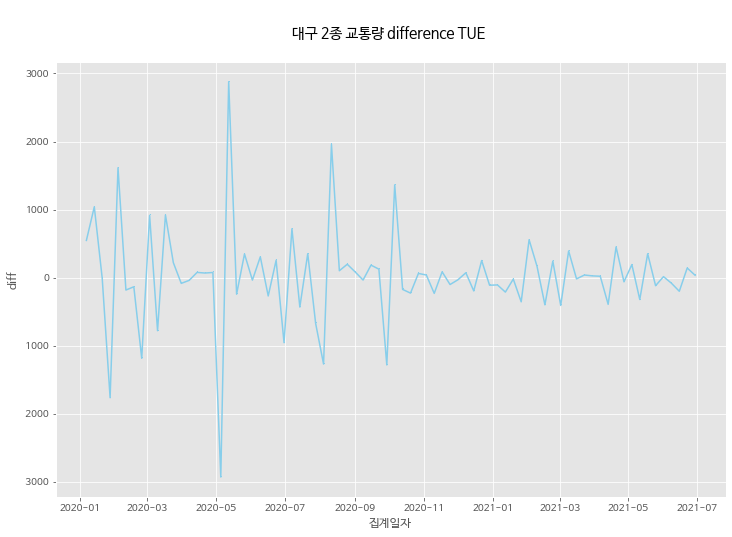

In [46]:
#요일별 편차 // 화요일
two_traffic_tue= daegu_traffic_data[daegu_traffic_data.day_of_week=='TUE']
two_traffic_temp=two_traffic_tue['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_tue['diff_temp']=two_traffic_temp
two_traffic_tue['diff']=two_traffic_tue['2종교통량']-two_traffic_tue['diff_temp']
two_traffic_tue['diff2']=two_traffic_tue['2종교통량']-two_traffic_tue['2종교통량'].median()
two_traffic_tue.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_tue[((two_traffic_tue.year==2020)|(two_traffic_tue.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference TUE \n')

<ipython-input-47-499082b79610>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_WED['diff_temp']=two_traffic_temp
<ipython-input-47-499082b79610>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_traffic_WED['diff']=two_traffic_WED['2종교통량']-two_traffic_WED['diff_temp']
<ipython-input-47-499082b79610>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

[Text(0.5, 1.0, '\n대구 2종 교통량 difference WED\n')]

C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhw99\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


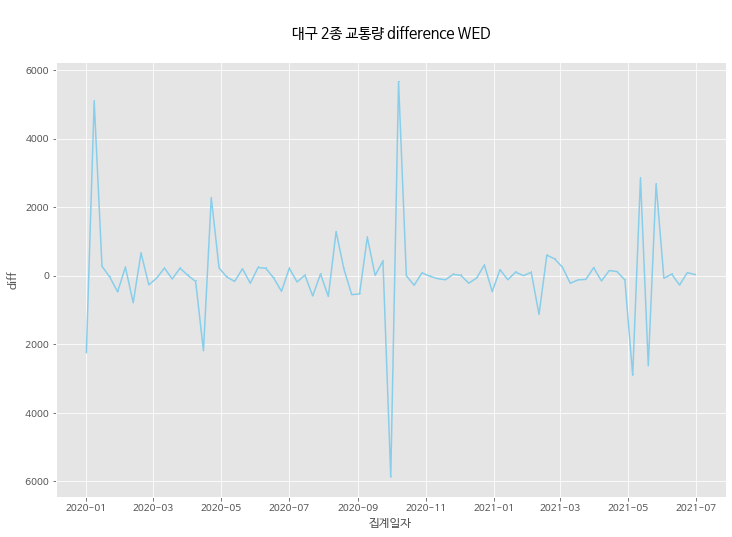

In [47]:
#요일별 편차 // 수요일
two_traffic_WED= daegu_traffic_data[daegu_traffic_data.day_of_week=='WED']
two_traffic_temp=two_traffic_WED['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_WED['diff_temp']=two_traffic_temp
two_traffic_WED['diff']=two_traffic_WED['2종교통량']-two_traffic_WED['diff_temp']
two_traffic_WED['diff2']=two_traffic_WED['2종교통량']-two_traffic_WED['2종교통량'].median()
two_traffic_WED.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_WED[((two_traffic_WED.year==2020)|(two_traffic_WED.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference WED\n')